In [30]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [31]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [32]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [33]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6)


In [34]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in june_temps]

In [35]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps_list,columns=['June Temps'])

In [36]:
june_df.head()

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [37]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [44]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 12)


In [61]:
# 7. Convert the December temperatures to a list.
dec_temps_list = [temp.tobs for temp in dec_temps]

In [62]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temps_list,columns=['December Temps'])


In [63]:
dec_df.head()

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [64]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


      date  precipitation
2010-12-01           0.04
2010-12-01           0.03
2010-12-01           0.70
2010-12-01           0.03
2010-12-01           1.35
2010-12-01           0.13
2010-12-01           1.48
2010-12-01           0.76
2010-12-02            NaN
2010-12-02           0.16
2010-12-02           0.06
2010-12-02           0.26
2010-12-02           0.00
2010-12-02           0.13
2010-12-02           0.02
2010-12-02           0.18
2010-12-03           1.59
2010-12-03           0.01
2010-12-03           0.78
2010-12-03           0.00
2010-12-03           0.22
2010-12-03           0.01
2010-12-03           0.47
2010-12-03           0.16
2010-12-04           0.00
2010-12-04           0.00
2010-12-04           0.19
2010-12-04           0.00
2010-12-04           0.00
2010-12-04           0.00
2010-12-04           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05            NaN
2010-12-05  

<AxesSubplot:xlabel='date'>

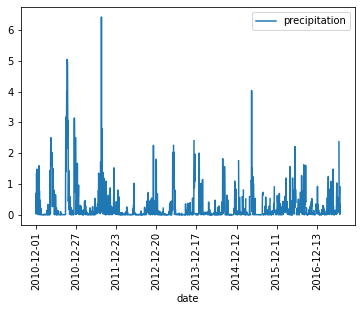

In [148]:
dec_rain_list = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12)
dec_rain_df = pd.DataFrame(dec_rain_list, columns=['date', 'precipitation'])
dec_rain_df.set_index(dec_rain_df['date'], inplace=True)
dec_rain_df = dec_rain_df.sort_index()
print(dec_rain_df.to_string(index=False))
dec_rain_df.plot(rot=90)

      date  precipitation
2010-06-01           0.00
2010-06-01           0.01
2010-06-01           0.00
2010-06-01            NaN
2010-06-01           0.03
2010-06-01           0.00
2010-06-01           0.00
2010-06-01           0.08
2010-06-01           0.03
2010-06-02           0.00
2010-06-02           0.03
2010-06-02           0.00
2010-06-02           0.00
2010-06-02           0.03
2010-06-02           0.00
2010-06-02           0.00
2010-06-02           0.00
2010-06-02           0.01
2010-06-03           0.00
2010-06-03           0.00
2010-06-03           0.10
2010-06-03           0.00
2010-06-03           0.14
2010-06-03           0.00
2010-06-03           0.00
2010-06-03           0.00
2010-06-03           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.01
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-05           0.00
2010-06-05  

<AxesSubplot:xlabel='date'>

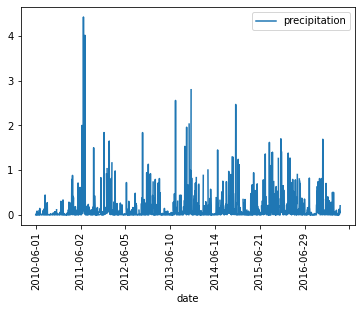

In [147]:
jun_rain_list = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6)
jun_rain_df = pd.DataFrame(jun_rain_list, columns=['date', 'precipitation'])
jun_rain_df.set_index(jun_rain_df['date'], inplace=True)
jun_rain_df = jun_rain_df.sort_index()
print(jun_rain_df.to_string(index=False))
jun_rain_df.plot(rot=90)